Autores Gabriel Conejo Valerio -2014093542 Nasser Brown Joseph Jimenez Zuñiga - 2016133677

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Set de Datos 'Rain in Australia'

In [2]:
df = pd.read_csv("SetDatos/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Optimizacion de datos

In [44]:
dictDIR = { 'N': 0,'NNE': 22.5,'NE': 45,'ENE': 67.5,'E': 90,'ESE': 112.5,'SE': 135,'SSE': 157.5,'S': 180,'SSW': 202.5,'SW': 225,'WSW': 247.5,'W': 270,'WNW':292.5 ,'NW':315 ,'NNW':337.5}
dictlluv={'No':0,'Yes':1}


label_encoder = LabelEncoder()
df = df.dropna(subset=['RainTomorrow','RainToday','WindGustDir','WindDir9am'])
df['WindGustDir'] = df['WindGustDir'].map(dictDIR)
df['WindDir9am'] = df['WindDir9am'].map(dictDIR)
df['WindDir3pm'] = df['WindDir3pm'].map(dictDIR)
df['RainToday'] = df['RainToday'].map(dictlluv)
df['RainTomorrow'] = df['RainTomorrow'].map(dictlluv)
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.value)


df = df.fillna(0)
names = df.columns
df = preprocessing.normalize(df, axis=0)

df= pd.DataFrame(df, columns=names)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,0.000107,0.002727,0.002647,0.000192,0.0,0.0,0.0,0.002916,0.0,...,0.002873,0.001141,0.002919,0.002925,0.005444,0.000000,0.002604,0.002700,0.0,0.0
1,0.0,0.000107,0.001506,0.002902,0.000000,0.0,0.0,0.0,0.002916,0.0,...,0.001781,0.001296,0.002927,0.002927,0.000000,0.000000,0.002650,0.003010,0.0,0.0
2,0.0,0.000107,0.002625,0.002971,0.000000,0.0,0.0,0.0,0.003048,0.0,...,0.001538,0.001555,0.002919,0.002929,0.000000,0.001383,0.003236,0.002874,0.0,0.0
3,0.0,0.000107,0.001872,0.003237,0.000000,0.0,0.0,0.0,0.001590,0.0,...,0.001821,0.000830,0.002948,0.002941,0.000000,0.000000,0.002789,0.003283,0.0,0.0
4,0.0,0.000107,0.003561,0.003734,0.000321,0.0,0.0,0.0,0.002717,0.0,...,0.003319,0.001711,0.002928,0.002921,0.004764,0.005532,0.002743,0.003679,0.0,0.0


In [46]:
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Pressure9am', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp9am']
X = df[features]
y = df.RainTomorrow
# Divide los datos en conjuntos de entrenamiento y prueba
X_train_weatherDataset, X_test_weatherDataset, y_train_weatherDataset, y_test_weatherDataset = train_test_split(X, y, test_size=0.15, random_state=45)
# Inicializa el objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta y transforma los datos de entrenamiento
X_train_weatherDataset = scaler.fit_transform(X_train_weatherDataset)
# Transforma los datos de prueba utilizando la misma escala que se usó para los datos de entrenamiento
y_train_weatherDataset = (y_train_weatherDataset > 0.5).astype(int)
X_test_weatherDataset = scaler.transform(X_test_weatherDataset)

Set de Datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 5.csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 5 (1).csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 4.csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 4 (1).csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 4 (2).csv")
df= pd.read_csv("SetDatos/p1-3-2-2.csv")
df.head()

In [ ]:
features = ['E1', 'E2',  'Q1']
X = df[features]
y = df.F;
X_train_notesDataset, X_test_notesDataset, y_train_notesDataset, y_test_notesDataset = train_test_split(X, y, test_size=0.15, random_state=45)
scaler = MinMaxScaler()
X_train__notesDataset = scaler.fit_transform(X_train_notesDataset)
X_test__notesDataset = scaler.transform(X_test_notesDataset)

Set de Datos seleccionado

In [ ]:
df = pd.read_csv("SetDatos/csv")
df.head()

In [ ]:
features = ['Caracteristica1', 'Caracteristica2', 'Caracteristica3', 'Caracteristica4']
X = df[features]
y = df.Outcome;
X_train_selectedDataset, X_test_selectedDataset, y_train_selectedDataset, y_test_selectedDataset = train_test_split(X, y, test_size=0.15, random_state=45)
scaler = MinMaxScaler()
X_train_selectedDataset = scaler.fit_transform(X_train_notesDataset)
X_test_selectedDataset = scaler.transform(X_test_selectedDataset)

Aplicacion de Algoritmos

Regresion Logistica

In [13]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.w = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient
            
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.w))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    
    def score(self, y_pred,y_test):
        return float(sum(y_pred == y_test)) / float(len(y_test))

Aplicacion de Algoritmo Logistic Regression sobre el set de datos Rain in Australia

In [47]:
# Crea y entrena el modelo de regresión logística 
model = LogisticRegression(lr=0.15, num_iter=3500)
model.fit(X_train_weatherDataset, y_train_weatherDataset)
probs = model.predict_prob(X_test_weatherDataset)
y_pred_weatherDataset = model.predict(X_test_weatherDataset, 0.5)
print("Precisión del modelo Regresion Logistica para el set de Datos Weather: ",model.score(y_pred_weatherDataset,y_test_weatherDataset))

Precisión del modelo Regresion Logistica para el set de Datos Weather:  1.0


Aplicacion de Algoritmo Logistic Regression sobre el set de 'Notas del curso de Introduccion a la Programacion'

In [ ]:
# Crea y entrena el modelo de regresión logística
model = LogisticRegression(lr=0.15, num_iter=3500)
model.fit(X_train_notesDataset, y_train_notesDataset)
probs = model.predict_prob(X_test_notesDataset)
y_pred_notesDataset = model.predict(X_test_notesDataset, 0.5)
print("Precisión del modelo Regresion Logistica para el set de datos Notas del curso: ",model.score(y_pred_notesDataset,y_test_notesDataset))


Aplicacion de Algoritmo Logistic Regression sobre el set elegido

In [ ]:
# Crea y entrena el modelo de regresión logística
model = LogisticRegression(lr=0.15, num_iter=3500)
model.fit(X_train_selectedDataset, y_train_selectedDataset)
probs = model.predict_prob(X_test_selectedDataset)
y_pred_selectedDataset = model.predict(X_test_selectedDataset, 0.5)
print("Precisión del modelo Regresion Logistica para el set de datos elegido: ",model.score(y_pred_selectedDataset,y_test_selectedDataset))


Arboles de decision

In [55]:
# Definición de la función para calcular la entropía
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Definición de la función para dividir los datos
def split_data(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    return X_left, y_left, X_right, y_right

# Definición de la clase del nodo del árbol de decisión
class Node:
    def __init__(self, depth=0, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def fit(self, X, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        self.value = unique_classes[np.argmax(class_counts)]
        if self.depth == self.max_depth or len(unique_classes) == 1: # Se pregunta las dos condiciones de paradas, sin divisiones y profundidad máxima
            return

        num_features = X.shape[1] # cantidad de Features
        best_info_gain = -1 # métrica
        
        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, y_left, X_right, y_right = split_data(X, y, feature_index, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                info_gain = entropy(y) - ((len(y_left) / len(y)) * entropy(y_left) + (len(y_right) / len(y)) * entropy(y_right))

                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.feature_index = feature_index
                    self.threshold = threshold

        if self.feature_index is not None:
            X_left, y_left, X_right, y_right = split_data(X, y, self.feature_index, self.threshold)
            self.left = Node(depth=self.depth + 1, max_depth=self.max_depth)
            self.left.fit(X_left, y_left)
            self.right = Node(depth=self.depth + 1, max_depth=self.max_depth)
            self.right.fit(X_right, y_right)

    def predict(self, X):
        if self.feature_index is None:
            return self.value
        if X[self.feature_index] <= self.threshold:
            return self.left.predict(X)
        else:
            return self.right.predict(X)

Aplicacion de Algoritmo Arboles de decision sobre el set de datos Rain in Australia

In [56]:
max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_weatherDataset, y_train_weatherDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_weatherDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_weatherDataset)
print(f"Precisión del Algoritmo Arboles de decision sobre el set de datos Rain in Australia : {accuracy:.2f}")


Precisión del Algoritmo Arboles de decision sobre el set de datos Rain in Australia : 1.00


Aplicacion de Algoritmo Arboles de decision sobre el set de 'Notas del curso de Introduccion a la Programacion'

In [ ]:
max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_notesDataset, y_train_notesDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_notesDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_notesDataset)
print(f"Precisión del Algoritmo Arboles de decision sobre el set de datos 'Notas del curso de Introduccion a la Programacion' : {accuracy:.2f}")

Aplicacion de Algoritmo Arboles de decision sobre el set elegido

In [ ]:
max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_selectedDataset, y_train_selectedDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_selectedDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_selectedDataset)
print(f"Precisión del Algoritmo Arboles de decision sobre el set elegido : {accuracy:.2f}")


KNN

In [11]:
class KNearestNeighbors:
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.X_train = X_train
        self.y_train = y_train
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.n_classes = len(np.unique(y_train))
    def custom_distance(self, a, b):
        return np.sum(np.abs(a - b))
    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2, axis=1))
    def kneighbors(self, X_test, return_distance=False):
        dist = []
        neigh_ind = []
        point_dist = []
        for x_test in X_test:
            if self.metric == 'custom':
                point_dist.append([self.custom_distance(x_test, x_train) for x_train in self.X_train])
            elif self.metric == 'euclidean':
                point_dist.append(self.euclidean_distance(x_test, self.X_train))

        point_dist = np.array(point_dist)
        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:self.n_neighbors]
            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]
            dist.append(dist_list)
            neigh_ind.append(ind_list)
        if return_distance:
            return np.array(dist), np.array(neigh_ind)
        return np.array(neigh_ind)
    def predict(self, X_test):
        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            return y_pred
        if self.weights == 'distance':
            neighbors, dist = self.kneighbors(X_test, return_distance=True)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor], weights=1 / (d + 1e-8)))
                for neighbor, d in zip(neighbors, dist)
            ])
            return y_pred
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test

Aplicacion de Algoritmo KNearestNeighbors sobre el set de datos Rain in Australia

In [12]:
from sklearn.neighbors import KNeighborsClassifier
our_classifier = KNearestNeighbors(X_train_weatherDataset, y_train_weatherDataset, n_neighbors=30)
sklearn_classifier = KNeighborsClassifier(n_neighbors=30).fit(X_train_weatherDataset, y_train_weatherDataset)

our_accuracy, y_pred, y_test = our_classifier.score(X_test_weatherDataset, y_test_weatherDataset)
sklearn_accuracy = sklearn_classifier.score(X_test_weatherDataset, y_test_weatherDataset)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_weatherDataset, y_train_weatherDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_weatherDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_weatherDataset)
print(f"Precisión del Algoritmo KNearestNeighbors sobre el set de datos Rain in Australia : {accuracy:.2f}")

Aplicacion de Algoritmo KNearestNeighbors sobre el set de 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
our_classifier = KNearestNeighbors(X_train_notesDataset, y_train_notesDataset, n_neighbors=30)
sklearn_classifier = KNeighborsClassifier(n_neighbors=30).fit(X_train_notesDataset, y_train_notesDataset)

our_accuracy, y_pred, y_test = our_classifier.score(X_test_notesDataset, y_test_notesDataset)
sklearn_accuracy = sklearn_classifier.score(X_test_notesDataset, y_test_notesDataset)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_weatherDataset, y_train_weatherDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_weatherDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_weatherDataset)
print(f"Precisión del Algoritmo KNearestNeighbors sobre el set de datos 'Notas del curso de Introduccion a la Programacion' : {accuracy:.2f}")

Aplicacion de Algoritmo KNearestNeighbors sobre el set elegido

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
our_classifier = KNearestNeighbors(X_train_selectedDataset, y_train_selectedDataset, n_neighbors=30)
sklearn_classifier = KNeighborsClassifier(n_neighbors=30).fit(X_train_selectedDataset, y_train_selectedDataset)

our_accuracy, y_pred, y_test = our_classifier.score(X_test_selectedDataset, y_test_selectedDataset)
sklearn_accuracy = sklearn_classifier.score(X_test_selectedDataset, y_test_selectedDataset)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_weatherDataset, y_train_weatherDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_weatherDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_weatherDataset)
print(f"Precisión del Algoritmo KNearestNeighbors sobre el set de datos elegido : {accuracy:.2f}")


Aplicacion de Metricas

Accuracy

Aplicacion de Metrica Accuracy sobre el set de datos Rain in Australia

In [48]:
from sklearn.metrics import accuracy_score
print("Metrica Accuracy sobre el set de datos Rain in Australia ")
accuracy = accuracy_score(y_test_weatherDataset, y_pred_weatherDataset)
print("The accuracy of prediction is: ", accuracy)

accurate_predictions = accuracy_score(y_test_weatherDataset, y_pred_weatherDataset, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)


Metrica Accuracy sobre el set de datos Rain in Australia 
The accuracy of prediction is:  1.0
The number of accurate predictions is:  18657


Aplicacion de Metrica Accuracy sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.metrics import accuracy_score
print("Metrica Accuracy sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")
accuracy = accuracy_score(y_train_notesDataset, y_test_notesDataset)
print("The accuracy of prediction is: ", accuracy)

accurate_predictions = accuracy_score(y_train_notesDataset, y_test_notesDataset, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

Aplicacion de Metrica Accuracy sobre el set de datos elegido

In [ ]:
from sklearn.metrics import accuracy_score
print("Metrica Accuracy sobre el set de datos elegido ")
accuracy = accuracy_score(y_train_selectedDataset, y_test_selectedDataset)
print("The accuracy of prediction is: ", accuracy)

accurate_predictions = accuracy_score(y_train_selectedDataset, y_test_selectedDataset, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

Presicion 

Aplicacion de Metrica Presicion sobre el set de datos Rain in Australia

In [49]:
from sklearn.metrics import precision_score
print("Metrica Precision sobre el set de datos Rain in Australia ")
precision = precision_score(y_test_weatherDataset, y_pred_weatherDataset, zero_division=0.0)
print("The precision score is: ", precision)

Metrica Precision sobre el set de datos Rain in Australia 
The precision score is:  0.0


Aplicacion de Metrica Presicion sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.metrics import precision_score
print("Metrica Precision sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")
precision = precision_score(y_train_notesDataset, y_test_notesDataset)
print("The accuracy of precision is: ", precision)

Aplicacion de Metrica Presicion sobre el set de datos elegido

In [ ]:
from sklearn.metrics import precision_score
print("Metrica Precision sobre el set de datos elegido ")
precision = precision_score(y_train_selectedDataset, y_test_selectedDataset)
print("The accuracy of precision is: ", precision)

Recall

Aplicacion de Metrica Recall sobre el set de datos Rain in Australia

In [53]:
from sklearn.metrics import recall_score
print("Metrica Recall sobre el set de datos Rain in Australia ")
recall = recall_score(y_test_weatherDataset, y_pred_weatherDataset, zero_division=0.0)
print("The recall of prediction is: ", recall)

Metrica Recall sobre el set de datos Rain in Australia 
The recall of prediction is:  0.0


Aplicacion de Metrica Recall sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.metrics import  recall_score
print("Metrica Precision sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")
recall = recall_score(y_train_notesDataset, y_test_notesDataset)
print("The recall of prediction is: ", recall)

Aplicacion de Metrica Recall sobre el set de datos elegido

In [ ]:
from sklearn.metrics import  recall_score
print("Metrica Precision sobre el set de datos elegido ")
recall = recall_score(y_train_selectedDataset, y_test_selectedDataset)
print("The recall of prediction is: ", recall)

AUC

Aplicacion de Metrica AUC sobre el set de datos Rain in Australia

Aplicacion de Metrica AUC sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

Aplicacion de Metrica AUC sobre el set de datos elegido

ROC  (grafica)

Aplicacion de Metrica ROC (grafica) sobre el set de datos Rain in Australia

Metrica ROC (grafica) sobre el set de datos Rain in Australia 


c:\Users\Odin\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


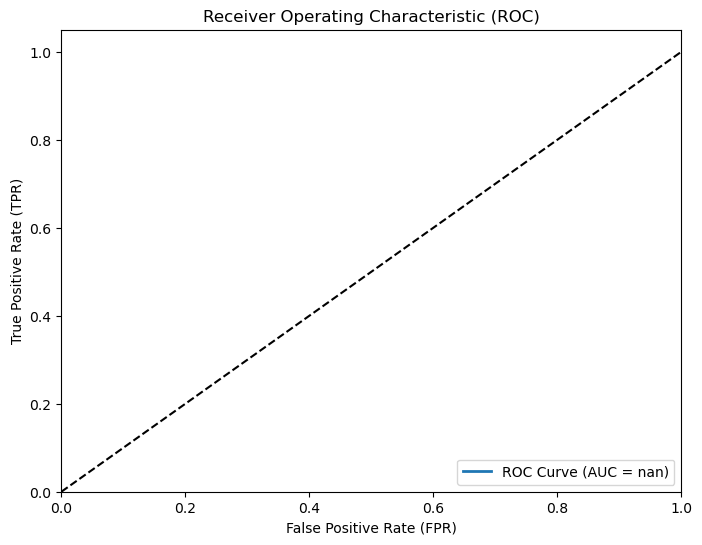

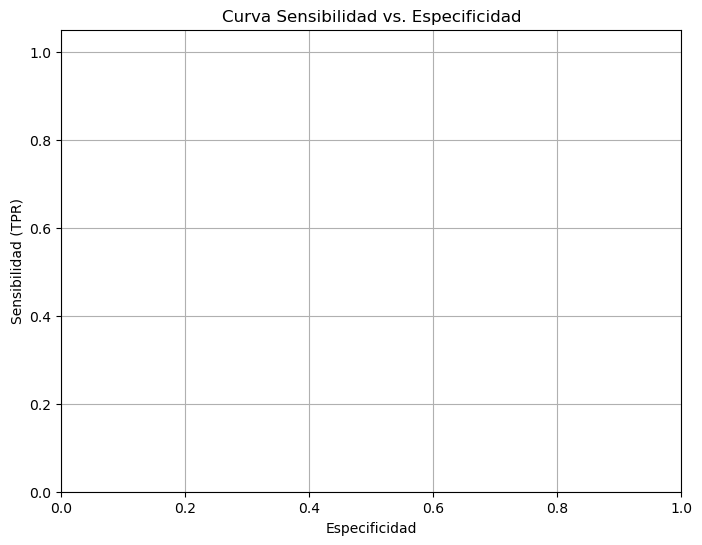

Sensibilidad (TPR) a umbral 0.5: nan
Especificidad a umbral 0.5: 1.00


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
print("Metrica ROC (grafica) sobre el set de datos Rain in Australia ")

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_weatherDataset, probs)

# Calcular la Sensibilidad y la Especificidad para cada umbral
sensibilidad = tpr  # Sensibilidad es igual a la Tasa de Verdaderos Positivos (TPR)
especificidad = 1 - fpr  # Especificidad es igual a 1 menos la Tasa de Falsos Positivos (FPR)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Trazar la curva de Sensibilidad vs. Especificidad
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curva Sensibilidad vs. Especificidad')
plt.grid(True)

plt.show()

umbral = 0.5
sensibilidad_umbral = tpr[np.argmax(thresholds >= umbral)]
especificidad_umbral = 1 - fpr[np.argmax(thresholds >= umbral)]
print(f"Sensibilidad (TPR) a umbral {umbral}: {sensibilidad_umbral:.2f}")
print(f"Especificidad a umbral {umbral}: {especificidad_umbral:.2f}")



Aplicacion de Metrica ROC (grafica) sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
print("Metrica ROC (grafica) sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_notesDataset, probs)

# Calcular la Sensibilidad y la Especificidad para cada umbral
sensibilidad = tpr  # Sensibilidad es igual a la Tasa de Verdaderos Positivos (TPR)
especificidad = 1 - fpr  # Especificidad es igual a 1 menos la Tasa de Falsos Positivos (FPR)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Trazar la curva de Sensibilidad vs. Especificidad
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curva Sensibilidad vs. Especificidad')
plt.grid(True)

plt.show()

umbral = 0.5
sensibilidad_umbral = tpr[np.argmax(thresholds >= umbral)]
especificidad_umbral = 1 - fpr[np.argmax(thresholds >= umbral)]
print(f"Sensibilidad (TPR) a umbral {umbral}: {sensibilidad_umbral:.2f}")
print(f"Especificidad a umbral {umbral}: {especificidad_umbral:.2f}")

Aplicacion de Metrica ROC (grafica) sobre el set de datos elegido

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
print("Metrica ROC (grafica) sobre el set de datos elegido ")

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_selectedDataset, probs)

# Calcular la Sensibilidad y la Especificidad para cada umbral
sensibilidad = tpr  # Sensibilidad es igual a la Tasa de Verdaderos Positivos (TPR)
especificidad = 1 - fpr  # Especificidad es igual a 1 menos la Tasa de Falsos Positivos (FPR)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Trazar la curva de Sensibilidad vs. Especificidad
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curva Sensibilidad vs. Especificidad')
plt.grid(True)

plt.show()

umbral = 0.5
sensibilidad_umbral = tpr[np.argmax(thresholds >= umbral)]
especificidad_umbral = 1 - fpr[np.argmax(thresholds >= umbral)]
print(f"Sensibilidad (TPR) a umbral {umbral}: {sensibilidad_umbral:.2f}")
print(f"Especificidad a umbral {umbral}: {especificidad_umbral:.2f}")

Puntos extra: modelo que prediga la nota del estudiante (utilizando el set de datos de Introduccion a la Programacion)